<a href="https://colab.research.google.com/github/NMNayan57/Diabetes/blob/master/Ai_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier











Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:

df = pd.read_csv('/content/diabetes.csv')#, names=column_names)
column_names = df.columns.tolist()

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 0 duplicates data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

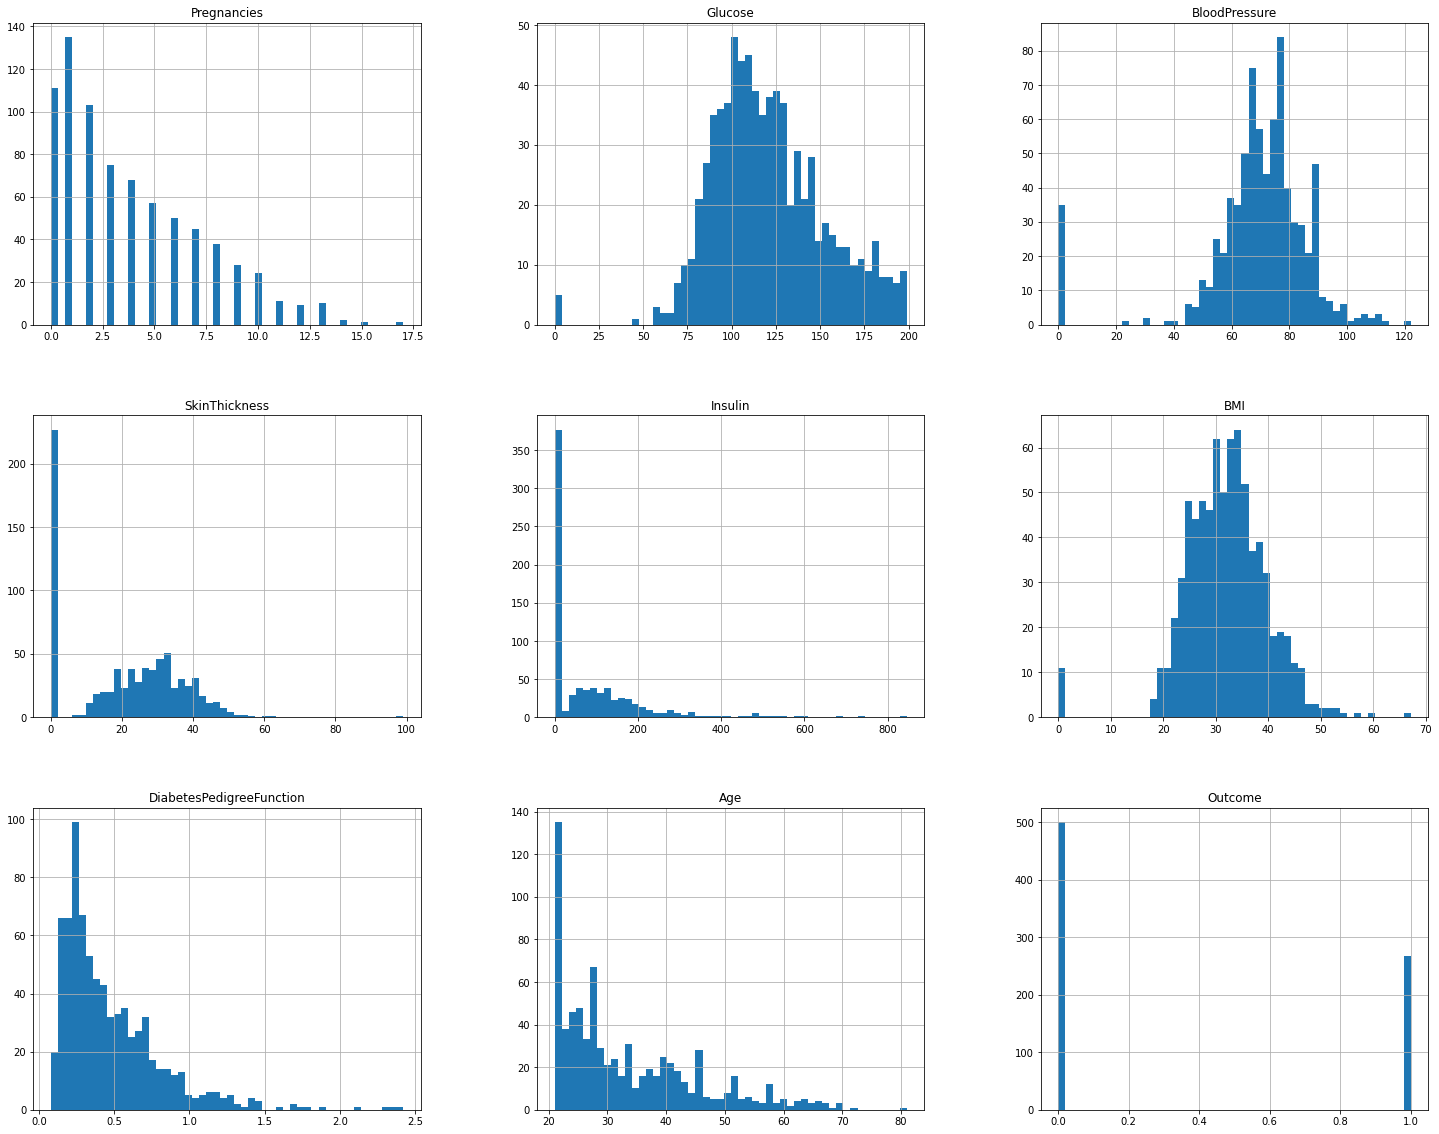

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

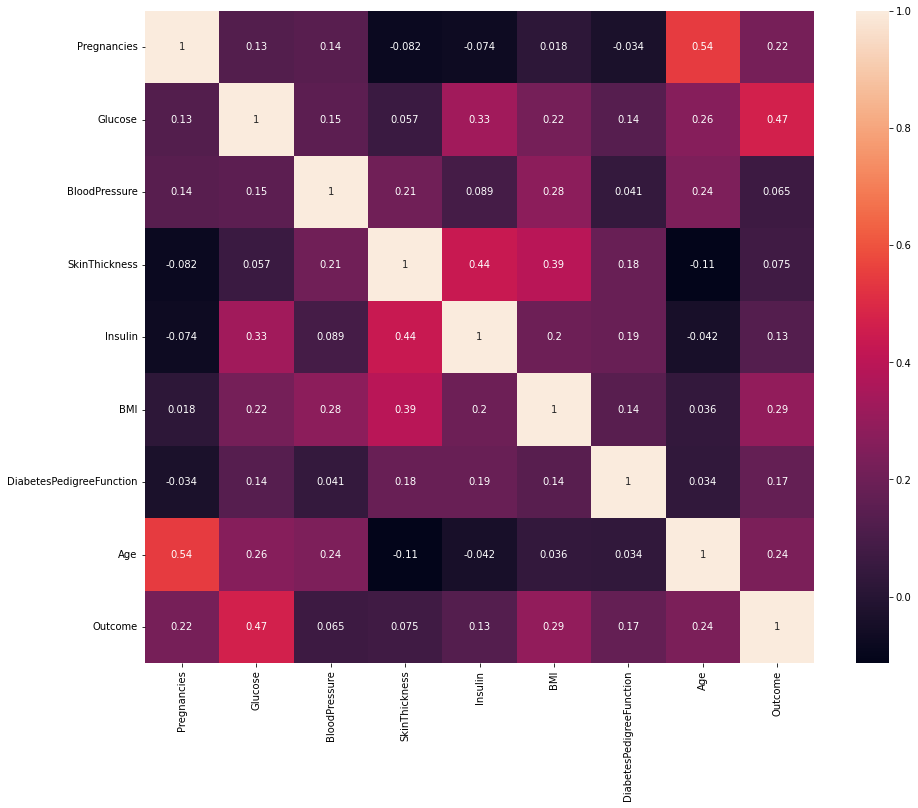

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Train Test Split

In [ ]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from featurewiz import featurewiz

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (768, 9)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##############################################

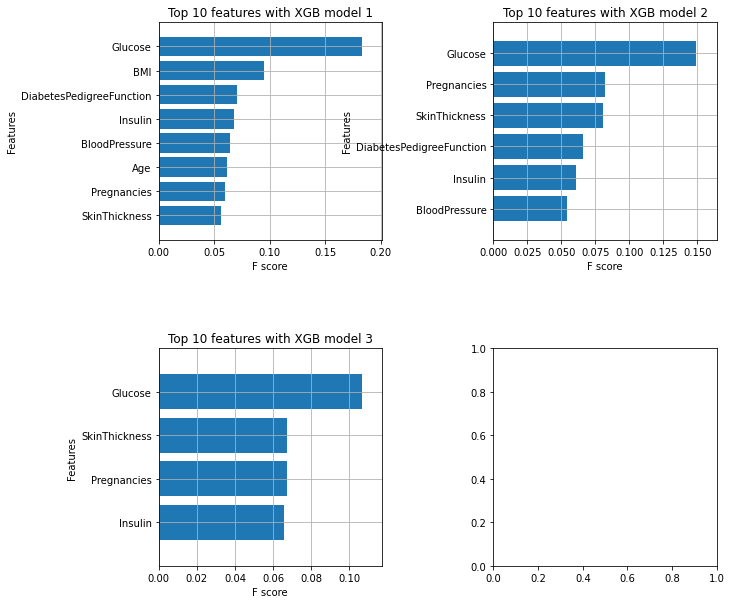

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 0 important features:
[]
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 0 important features and a train dataframe


In [ ]:
target = 'Outcome'
 
features= featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy()

In [ ]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.135762,0.144266,-0.076156,-0.082084,0.072771,-0.050057,0.531616,0.265470
Glucose,0.135762,1.000000,0.179130,0.073055,0.347149,0.244154,0.117812,0.272617,0.475808
BloodPressure,0.144266,0.179130,1.000000,0.170777,0.078019,0.289786,0.028083,0.239738,0.099649
SkinThickness,-0.076156,0.073055,0.170777,1.000000,0.418734,0.397526,0.205983,-0.091928,0.071515
Insulin,-0.082084,0.347149,0.078019,0.418734,1.000000,0.178318,0.199839,-0.028909,0.097950
BMI,0.072771,0.244154,0.289786,0.397526,0.178318,1.000000,0.148547,0.065399,0.263893
DiabetesPedigreeFunction,-0.050057,0.117812,0.028083,0.205983,0.199839,0.148547,1.000000,0.033502,0.175407
Age,0.531616,0.272617,0.239738,-0.091928,-0.028909,0.065399,0.033502,1.000000,0.290577
Outcome,0.265470,0.475808,0.099649,0.071515,0.097950,0.263893,0.175407,0.290577,1.000000


In [ ]:
correlation_matrix["Outcome"].sort_values()

SkinThickness               0.071515
Insulin                     0.097950
BloodPressure               0.099649
DiabetesPedigreeFunction    0.175407
BMI                         0.263893
Pregnancies                 0.265470
Age                         0.290577
Glucose                     0.475808
Outcome                     1.000000
Name: Outcome, dtype: float64

handling missing data


In [ ]:
names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [ ]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
389,3,100.0,68.0,23.0,81.0,31.6,0.949,28,0
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0
297,0,126.0,84.0,29.0,215.0,30.7,0.520,24,0
728,2,175.0,88.0,NaN,NaN,22.9,0.326,22,0
314,7,109.0,80.0,31.0,NaN,35.9,1.127,43,1


In [ ]:
glucose_median = train_df["Glucose"].median()
blood_pressure_median = train_df["BloodPressure"].median()
skin_thickness_median = train_df["SkinThickness"].median()
insulin_median = train_df["Insulin"].median()
bmi_median = train_df["BMI"].median()
age_median = train_df["Age"].median()
dpf_median = train_df['DiabetesPedigreeFunction'].median()

train_df["Glucose"].fillna(glucose_median, inplace=True)
train_df["BloodPressure"].fillna(blood_pressure_median, inplace=True)
train_df["SkinThickness"].fillna(skin_thickness_median, inplace=True)
train_df["Insulin"].fillna(insulin_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)
train_df["Age"].fillna(age_median, inplace=True)
train_df["DiabetesPedigreeFunction"].fillna(dpf_median, inplace=True)

In [ ]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
389,3,100.0,68.0,23.0,81.0,31.6,0.949,28,0
767,1,93.0,70.0,31.0,123.5,30.4,0.315,23,0
297,0,126.0,84.0,29.0,215.0,30.7,0.520,24,0
728,2,175.0,88.0,29.0,123.5,22.9,0.326,22,0
314,7,109.0,80.0,31.0,123.5,35.9,1.127,43,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.647887,0.489796,0.304348,0.131611,0.314928,0.234415,0.483333,1.0
1,0.058824,0.204225,0.428571,0.239130,0.131611,0.171779,0.116567,0.166667,0.0
2,0.470588,0.894366,0.408163,0.239130,0.131611,0.104294,0.253629,0.183333,1.0
3,0.058824,0.232394,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.570423,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributesca
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.647887,0.489796,0.304348,0.131611,0.314928,0.234415,0.483333,1.0
1,0.058824,0.204225,0.428571,0.239130,0.131611,0.171779,0.116567,0.166667,0.0
2,0.470588,0.894366,0.408163,0.239130,0.131611,0.104294,0.253629,0.183333,1.0
3,0.058824,0.232394,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.570423,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,  random_state=0)

In [ ]:
#Random Forest
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))







              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154

mse= 0.22077922077922077
msle= 0.10607404203388864
mae= 0.22077922077922077
rmse= 0.4698714938993648


In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (786, 8)
After OverSampling, the shape of train_y: (786,) 

After OverSampling, counts of label '1': 393
After OverSampling, counts of label '0': 393


In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train_res, y_train_res.ravel())
predictions = rf.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))







              precision    recall  f1-score   support

           0       0.88      0.82      0.85       107
           1       0.65      0.74      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154

mse= 0.2012987012987013
msle= 0.0967145677367808
mae= 0.2012987012987013
rmse= 0.44866323818505716


In [ ]:
params = {
    "n_estimators": [20, 30, 40, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train_res, y_train_res)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'entropy', 'n_estimators': 100}


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.820837,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.814492,2
6,"{'criterion': 'entropy', 'n_estimators': 40}",0.813210,3
5,"{'criterion': 'entropy', 'n_estimators': 30}",0.808114,4
1,"{'criterion': 'gini', 'n_estimators': 30}",0.804301,5
4,"{'criterion': 'entropy', 'n_estimators': 20}",0.799221,6
2,"{'criterion': 'gini', 'n_estimators': 40}",0.799205,7
0,"{'criterion': 'gini', 'n_estimators': 20}",0.788997,8


In [ ]:
y_pred = grid.predict(x_test)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Processed Dataset Accuracy: {classification_report(y_test, y_pred)}")

Processed Dataset Accuracy: 0.8246753246753247
Processed Dataset Accuracy:               precision    recall  f1-score   support

           0       0.90      0.84      0.87       107
           1       0.69      0.79      0.73        47

    accuracy                           0.82       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.83      0.82      0.83       154



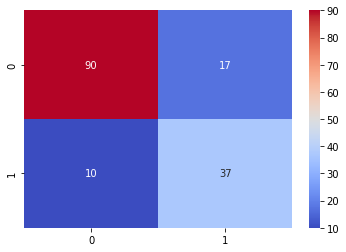

In [ ]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

In [ ]:
input_data = (0.058824,	0.264516,	0.428571,	0.392857,	0.139423,	0.171779,	0.116567,	0.166667)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = grid.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The person has Diabetes")
else:
  print("The preson has no diabetes ")

[0]
The person has Diabetes
